## Linear Regression

$$ \bar{y} = wx + b $$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import theano
from theano import tensor as T

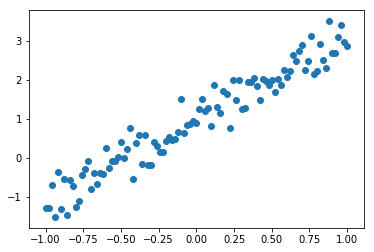

In [2]:
train_X = np.linspace(-1, 1, 101)
train_Y = 2 * train_X + 1 + np.random.randn(train_X.size) * 0.33
plt.scatter(train_X, train_Y)

In [3]:
X, Y = T.scalar(), T.scalar()
X.name, Y.name = 'x', 'y'

def linear_model(X, w, b):
    return X * w + b

损失函数： $ C = \left|\bar{y} - y \right|^2 $

我们可以使用梯度下降法来迭代参数 w,b 的值，为此，我们将 w 和 b 设成共享变量：

In [5]:
w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
w.name = 'w'
b = theano.shared(np.asarray(0., dtype=theano.config.floatX))
b.name = 'b'

Y_bar = linear_model(X, w, b)
theano.pp(Y_bar)

'((x * w) + b)'

In [6]:
cost = T.mean(T.sqr(Y_bar - Y))
grads = T.grad(cost=cost, wrt=[w, b])

In [8]:
lr = 0.01
updates = [[w, w - grads[0] * lr],
           [b, b - grads[1] * lr]]

train_model = theano.function(inputs=[X,Y],
                              outputs=cost,
                              updates=updates,
                              allow_input_downcast=True)

for i in range(100):
    for x, y in zip(train_X, train_Y):
        train_model(x, y)

2.0960926268346407
0.9833693080320884


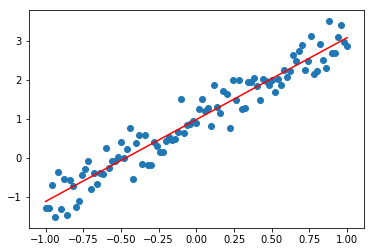

In [11]:
print(w.get_value()) 
print(b.get_value())

plt.scatter(train_X, train_Y)
plt.plot(train_X, w.get_value() * train_X + b.get_value(), 'r')

## Logistic Regression

$$ s(x) = \frac{1}{1 + e^{-x}} = \frac{1 + tanh\left(\frac{x}{2}\right)}{2} $$

In [12]:
rng = np.random

# 数据大小和规模
N = 400
feats = 784

# D = (X, Y)
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))

In [13]:
x = T.matrix('x')
y = T.vector('y')

# 要更新的变量：
w = theano.shared(rng.randn(feats), name='w')
b = theano.shared(0., name='b')

In [14]:
h = 1 / (1 + T.exp(-T.dot(x, w) - b))
prediction = h > 0.5

In [15]:
cost = - T.mean(y * T.log(h) + (1 - y) * T.log(1 - h)) + 0.01 * T.sum(w ** 2)  # 正则项，防止过拟合
gw, gb = T.grad(cost, [w, b])

In [16]:
train = theano.function(inputs=[x, y],
                        outputs=cost,
                        updates=[[w, w - 0.1 * gw], [b, b - 0.1 * gb]], 
                        allow_input_downcast=True)

predict = theano.function(inputs=[x],
                          outputs=prediction,
                          allow_input_downcast=True)

for i in range(10001):
    err = train(D[0], D[1])
    if i % 1000 == 0:
        print('iter {0:5d}, error {1}'.format(i, err))

iter     0, error nan
iter  1000, error 0.20916386518319272
iter  2000, error 0.12385585775631414
iter  3000, error 0.12256679622266706
iter  4000, error 0.12254240274449477
iter  5000, error 0.12254162133721462
iter  6000, error 0.12254152989301592
iter  7000, error 0.12254151063149532
iter  8000, error 0.12254150627087208
iter  9000, error 0.12254150527768518
iter 10000, error 0.12254150505136419


In [18]:
D[1]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1,

In [20]:
predict(D[0])

array([False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,

## Softmax Regression

[MNIST 数据集](http://yann.lecun.com/exdb/mnist/) 是一个手写数字组成的数据集，现在被当作一个机器学习算法评测的基准数据集。

这是一个下载并解压数据的脚本：

In [49]:
%%file download_mnist.py
import os
import os.path
import urllib
import gzip
import shutil

if not os.path.exists('mnist'):
    os.mkdir('mnist')

def download_and_gzip(name):
    if not os.path.exists(name + '.gz'):
        urllib.request.urlretrieve('http://yann.lecun.com/exdb/' + name + '.gz', name + '.gz')
    if not os.path.exists(name):
        with gzip.open(name + '.gz', 'rb') as f_in, open(name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
            
download_and_gzip('mnist/train-images-idx3-ubyte')
download_and_gzip('mnist/train-labels-idx1-ubyte')
download_and_gzip('mnist/t10k-images-idx3-ubyte')
download_and_gzip('mnist/t10k-labels-idx1-ubyte')

Writing download_mnist.py


In [50]:
%run download_mnist.py

In [51]:
%%file load.py
import numpy as np
import os

datasets_dir = './'

def one_hot(x,n):
	if type(x) == list:
		x = np.array(x)
	x = x.flatten()
	o_h = np.zeros((len(x),n))
	o_h[np.arange(len(x)),x] = 1
	return o_h

def mnist(ntrain=60000,ntest=10000,onehot=True):
	data_dir = os.path.join(datasets_dir,'mnist/')
	fd = open(os.path.join(data_dir,'train-images-idx3-ubyte'))
	loaded = np.fromfile(file=fd,dtype=np.uint8)
	trX = loaded[16:].reshape((60000,28*28)).astype(float)

	fd = open(os.path.join(data_dir,'train-labels-idx1-ubyte'))
	loaded = np.fromfile(file=fd,dtype=np.uint8)
	trY = loaded[8:].reshape((60000))

	fd = open(os.path.join(data_dir,'t10k-images-idx3-ubyte'))
	loaded = np.fromfile(file=fd,dtype=np.uint8)
	teX = loaded[16:].reshape((10000,28*28)).astype(float)

	fd = open(os.path.join(data_dir,'t10k-labels-idx1-ubyte'))
	loaded = np.fromfile(file=fd,dtype=np.uint8)
	teY = loaded[8:].reshape((10000))

	trX = trX/255.
	teX = teX/255.

	trX = trX[:ntrain]
	trY = trY[:ntrain]

	teX = teX[:ntest]
	teY = teY[:ntest]

	if onehot:
		trY = one_hot(trY, 10)
		teY = one_hot(teY, 10)
	else:
		trY = np.asarray(trY)
		teY = np.asarray(teY)

	return trX,teX,trY,teY

Writing load.py


In [52]:
from load import mnist

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

A = T.matrix()

B = T.nnet.softmax(A)

test_softmax = theano.function([A], B)

a = floatX(np.random.rand(3, 4))

b = test_softmax(a)

print(b.shape)

# 行和
print(b.sum(1))

(3, 4)
[ 1.  1.  1.]


In [53]:
def model(X, w):
    return T.nnet.softmax(T.dot(X, w))

trX, teX, trY, teY = mnist(onehot=True)

X = T.fmatrix()
Y = T.fmatrix()

w = init_weights((784, 10))

py_x = model(X, w)
y_pred = T.argmax(py_x, axis=1)

# 损失函数为多类的交叉熵，这个在 theano 中也被定义好了：
cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * 0.05]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

In [54]:
for i in range(100):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print("{0:03d}".format(i), np.mean(np.argmax(teY, axis=1) == predict(teX)))

000 0.8857
001 0.8977
002 0.9045
003 0.9074
004 0.9099
005 0.9111
006 0.9135
007 0.9143
008 0.9151
009 0.9159
010 0.9164
011 0.9167
012 0.9169
013 0.9172
014 0.9177
015 0.9177
016 0.9182
017 0.9188
018 0.919
019 0.919
020 0.9197
021 0.9199
022 0.9199
023 0.9204
024 0.9205
025 0.9205
026 0.9209
027 0.9211
028 0.9211
029 0.9214
030 0.9213
031 0.9216
032 0.9215
033 0.9218
034 0.9219
035 0.9218
036 0.9217
037 0.9218
038 0.9221
039 0.9222
040 0.9223
041 0.9225
042 0.9225
043 0.9225
044 0.9224
045 0.9225
046 0.9225
047 0.9224
048 0.923
049 0.9231
050 0.9233
051 0.9235
052 0.9236
053 0.9236
054 0.9236
055 0.9235
056 0.9236
057 0.9239
058 0.9241
059 0.9241
060 0.9242
061 0.9242
062 0.9242
063 0.9242
064 0.9245
065 0.9245
066 0.9245
067 0.9243
068 0.9244
069 0.9243
070 0.9245
071 0.9244
072 0.9245
073 0.9244
074 0.9245
075 0.9244
076 0.9243
077 0.9244
078 0.9244
079 0.9243
080 0.9243
081 0.9247
082 0.9248
083 0.9248
084 0.9248
085 0.9248
086 0.9246
087 0.9246
088 0.9246
089 0.9246
090 0.9247
09

## ANN(人工神经网络)

我们在这里使用一个简单的三层神经网络：输入 - 隐层 - 输出。

对于网络的激活函数，隐层用sigmoid函数，输出层用softmax函数，其模型如下：

$$ 
\begin{aligned}
    h &= \sigma (W_h X) \\
    o &= \text{softmax} (W_o h)
\end{aligned}
$$

In [55]:
def model(X, w_h, w_o):
    """
    input:
        X: input data
        w_h: hidden unit weights
        w_o: output unit weights
    output:
        Y: probability of y given x
    """
    # 隐层
    h = T.nnet.sigmoid(T.dot(X, w_h))
    # 输出层
    pyx = T.nnet.softmax(T.dot(h, w_o))
    return pyx

def sgd(cost, params, lr=0.05):
    """
    input:
        cost: cost function
        params: parameters
        lr: learning rate
    output:
        update rules
    """
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
    return updates

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

X = T.matrix()
Y = T.matrix()

w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

py_x = model(X, w_h, w_o)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
updates = sgd(cost, [w_h, w_o])

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

trX, teX, trY, teY = mnist(onehot=True)

In [57]:
for i in range(100):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print("{0:03d}".format(i), np.mean(np.argmax(teY, axis=1) == predict(teX)))

000 0.7079
001 0.829
002 0.8671
003 0.8831
004 0.8894
005 0.8954
006 0.8981
007 0.9016
008 0.9043
009 0.9068
010 0.9093
011 0.9114
012 0.9129
013 0.9141
014 0.9153
015 0.9159
016 0.9163
017 0.917
018 0.9176
019 0.9184
020 0.9188
021 0.919
022 0.9195
023 0.9197
024 0.9204
025 0.9208
026 0.921
027 0.9217
028 0.922
029 0.9228
030 0.9238
031 0.9236
032 0.9241
033 0.9251
034 0.9258
035 0.9262
036 0.9265
037 0.9271
038 0.9278
039 0.9286
040 0.9294
041 0.9295
042 0.9299
043 0.93
044 0.9304
045 0.9307
046 0.9317
047 0.9322
048 0.9331
049 0.9334
050 0.9338
051 0.9352
052 0.9359
053 0.9366
054 0.9374
055 0.9379
056 0.9385
057 0.939
058 0.9395
059 0.9399
060 0.9408
061 0.9414
062 0.9418
063 0.9423
064 0.9429
065 0.9434
066 0.944
067 0.9447
068 0.9451
069 0.9457
070 0.9464
071 0.9464
072 0.947
073 0.9474
074 0.9478
075 0.9485
076 0.9488
077 0.9491
078 0.95
079 0.9507
080 0.951
081 0.9513
082 0.9517
083 0.952
084 0.9527
085 0.9535
086 0.9536
087 0.9543
088 0.9545
089 0.9548
090 0.955
091 0.9554
092

## 更复杂的神经网络

之前我们采用的的激活函数是 sigmoid，现在我们使用 rectify 激活函数。

这可以使用 `T.nnet.relu(x, alpha=0)` 来实现，它本质上相当于：`T.switch(x > 0, x, alpha * x)`，而 rectify 函数的定义为：

$$
\text{rectify}(x) = \left\{
\begin{aligned}
x, & \ x > 0 \\
0, & \ x < 0
\end{aligned}\right.
$$

之前我们构造的是一个单隐层的神经网络结构，现在我们构造一个双隐层的结构即“输入-隐层1-隐层2-输出”的全连接结构。

$$
\begin{aligned}
& h_1 =  \text{rectify}(W_{h_1} \ x) \\
& h_2 =  \text{rectify}(W_{h_2} \ h_1) \\
& o =  \text{softmax}(W_o h_2)
\end{aligned}
$$

Theano 自带的 `T.nnet.softmax()` 的 GPU 实现目前似乎有 bug 会导致梯度溢出的问题，因此自定义了 softmax 函数：

In [58]:
def dropout(X, prob=0.):
    if prob > 0:
        X *= srng.binomial(X.shape, p=1-prob, dtype = theano.config.floatX)
        X /= 1 - prob
    return X

def softmax(X):
    e_x = T.exp(X - X.max(axis=1).dimshuffle(0, 'x'))
    return e_x / e_x.sum(axis=1).dimshuffle(0, 'x')

def model(X, w_h1, w_h2, w_o, p_drop_input, p_drop_hidden):
    """
    input:
        X:             input data
        w_h1:          weights input layer to hidden layer 1
        w_h2:          weights hidden layer 1 to hidden layer 2
        w_o:           weights hidden layer 2 to output layer
        p_drop_input:  dropout rate for input layer
        p_drop_hidden: dropout rate for hidden layer
    output:
        h1:    hidden layer 1
        h2:    hidden layer 2
        py_x:  output layer
    """
    X = dropout(X, p_drop_input)
    h1 = T.nnet.relu(T.dot(X, w_h1))
    
    h1 = dropout(h1, p_drop_hidden)
    h2 = T.nnet.relu(T.dot(h1, w_h2))
    
    h2 = dropout(h2, p_drop_hidden)
    py_x = softmax(T.dot(h2, w_o))
    return h1, h2, py_x

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

w_h1 = init_weights((784, 625))
w_h2 = init_weights((625, 625))
w_o = init_weights((625, 10))


X = T.matrix()
Y = T.matrix()

定义更新的规则，之前我们使用的是简单的 SGD，这次我们使用 RMSprop 来更新，其规则为：
$$
\begin{align}
MS(w, t) &= \rho MS(w, t-1) + (1-\rho) \left(\left.\frac{\partial E}{\partial w}\right|_{w(t-1)}\right)^2 \\
w(t) &= w(t-1) - \alpha \left.\frac{\partial E}{\partial w}\right|_{w(t-1)} / \sqrt{MS(w, t)}
\end{align}
$$

In [61]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
srng = RandomStreams()

def RMSprop(cost, params, accs, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g, acc in zip(params, grads, accs):
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    return updates

# 有 dropout，用来训练
noise_h1, noise_h2, noise_py_x = model(X, w_h1, w_h2, w_o, 0.2, 0.5)
cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w_h1, w_h2, w_o]
accs = [theano.shared(p.get_value() * 0.) for p in params]
updates = RMSprop(cost, params, accs, lr=0.001)
# 训练函数
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

# 没有 dropout，用来预测
h1, h2, py_x = model(X, w_h1, w_h2, w_o, 0., 0.)
# 预测的结果
y_x = T.argmax(py_x, axis=1)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

In [62]:
trX, teX, trY, teY = mnist(onehot=True)

for i in range(50):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print("iter {:03d} accuracy:".format(i + 1), np.mean(np.argmax(teY, axis=1) == predict(teX)))

iter 001 accuracy: 0.9412
iter 002 accuracy: 0.9633
iter 003 accuracy: 0.9721
iter 004 accuracy: 0.9745
iter 005 accuracy: 0.9741
iter 006 accuracy: 0.9775
iter 007 accuracy: 0.9762
iter 008 accuracy: 0.981
iter 009 accuracy: 0.9808
iter 010 accuracy: 0.9808
iter 011 accuracy: 0.9818
iter 012 accuracy: 0.9828
iter 013 accuracy: 0.9832
iter 014 accuracy: 0.9844
iter 015 accuracy: 0.984
iter 016 accuracy: 0.9826
iter 017 accuracy: 0.984
iter 018 accuracy: 0.9852
iter 019 accuracy: 0.9842
iter 020 accuracy: 0.9853
iter 021 accuracy: 0.9844
iter 022 accuracy: 0.9843
iter 023 accuracy: 0.9846
iter 024 accuracy: 0.9862
iter 025 accuracy: 0.9846
iter 026 accuracy: 0.9854
iter 027 accuracy: 0.9855
iter 028 accuracy: 0.9858
iter 029 accuracy: 0.9869
iter 030 accuracy: 0.9872
iter 031 accuracy: 0.9854
iter 032 accuracy: 0.9852
iter 033 accuracy: 0.9851
iter 034 accuracy: 0.9874
iter 035 accuracy: 0.9857
iter 036 accuracy: 0.9857
iter 037 accuracy: 0.9851
iter 038 accuracy: 0.986
iter 039 accurac

清理文件

In [77]:
import os
import shutil
os.remove("download_mnist.py")
os.remove("load.py")
shutil.rmtree("mnist")

In [74]:
from theano.tensor.nnet import conv2d
from theano.tensor.signal import pool

trX, teX, trY, teY = mnist(onehot=True)

trX = trX.reshape(-1, 1, 28, 28)
teX = teX.reshape(-1, 1, 28, 28)

def model(X, w, w2, w3, w4, p_drop_conv, p_drop_hidden):
    
    # X:  128 * 1 * 28 * 28
    # w:  32 * 1 * 3 * 3
    # full mode
    # l1a: 128 * 32 * (28 + 3 - 1) * (28 + 3 - 1)
    l1a = rectify(conv2d(X, w, border_mode='full'))
    # l1a: 128 * 32 * 30 * 30
    # ignore_border False
    # l1:  128 * 32 * (30 / 2) * (30 / 2)
    l1 = pool.pool_2d(l1a, (2, 2), ignore_border=False)
    l1 = dropout(l1, p_drop_conv)

    # l1:  128 * 32 * 15 * 15
    # w2:  64 * 32 * 3 * 3
    # valid mode
    # l2a: 128 * 64 * (15 - 3 + 1) * (15 - 3 + 1)
    l2a = rectify(conv2d(l1, w2))    
    # l2a: 128 * 64 * 13 * 13
    # l2:  128 * 64 * (13 / 2 + 1) * (13 / 2 + 1)
    l2 = pool.pool_2d(l2a, (2, 2), ignore_border=False)
    l2 = dropout(l2, p_drop_conv)

    # l2:  128 * 64 * 7 * 7
    # w3:  128 * 64 * 3 * 3
    # l3a: 128 * 128 * (7 - 3 + 1) * (7 - 3 + 1)
    l3a = rectify(conv2d(l2, w3))
    # l3a: 128 * 128 * 5 * 5
    # l3b: 128 * 128 * (5 / 2 + 1) * (5 / 2 + 1)
    l3b = pool.pool_2d(l3a, (2, 2), ignore_border=False)    
    # l3b: 128 * 128 * 3 * 3
    # l3:  128 * (128 * 3 * 3)
    l3 = T.flatten(l3b, outdim=2)
    l3 = dropout(l3, p_drop_conv)
    
    # l3: 128 * (128 * 3 * 3)
    # w4: (128 * 3 * 3) * 625
    # l4: 128 * 625
    l4 = rectify(T.dot(l3, w4))
    l4 = dropout(l4, p_drop_hidden)

    # l5:  128 * 625
    # w5:  625 * 10
    # pyx: 128 * 10
    pyx = softmax(T.dot(l4, w_o))
    return l1, l2, l3, l4, pyx

In [75]:
X = T.ftensor4()
Y = T.fmatrix()

w = init_weights((32, 1, 3, 3))
w2 = init_weights((64, 32, 3, 3))
w3 = init_weights((128, 64, 3, 3))
w4 = init_weights((128 * 3 * 3, 625))
w_o = init_weights((625, 10))

In [78]:
print("Theano Examples")

Theano Examples
